<a href="https://colab.research.google.com/github/AftabUdaipurwala/MLProjects/blob/main/Feature_Engineering_%26_Outlier_Detection%2BRemoval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

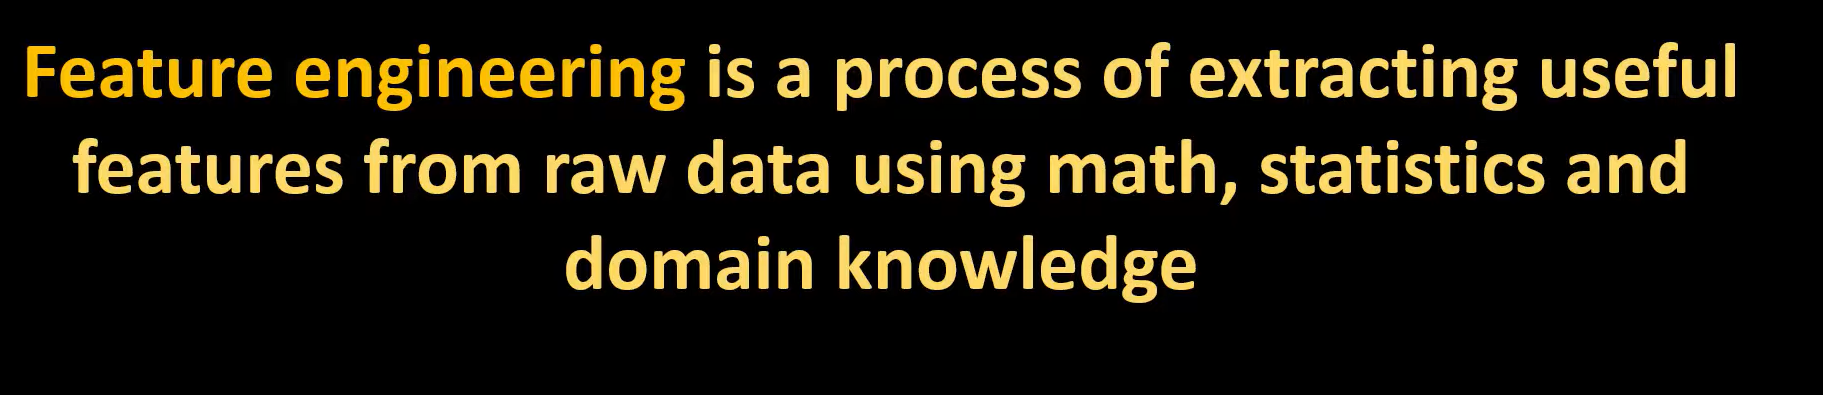

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!ls '/content/drive/MyDrive/py-master/ML/FeatureEngineering/1_outliers/'

1_outliers_percentile.ipynb  bhp.csv  Exercise	heights.csv  test_scores.xlsx


In [7]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

In [12]:
df= pd.read_csv('/content/drive/MyDrive/py-master/ML/FeatureEngineering/1_outliers/heights.csv')
df.head(4)

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5


In [14]:
round(df.height.quantile(0.95),2)

9.69

In [15]:
max_threshold= round(df.height.quantile(0.95),2)

In [17]:
df[df['height']>max_threshold]

,name,height
9,imran,14.5


In [21]:
min_threshold= round(df.height.quantile(0.05),2)
min_threshold

3.61

In [22]:
df[df['height']<min_threshold]

,name,height
12,yoseph,1.2


In [24]:
df[(df['height']<max_threshold) & (df['height']>min_threshold)] # Cleaned Dataset

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
10,jose,6.1


# ***Using slightly more complex Dataset***

In [25]:
df= pd.read_csv('/content/drive/MyDrive/py-master/ML/FeatureEngineering/1_outliers/bhp.csv')
df.head(4)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245


In [26]:
df.shape

(13200, 7)

In [27]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [34]:
# supplying array for min and max threshold values
min_threshold, max_threshold= df.price_per_sqft.quantile([0.01,0.99])
min_threshold,max_threshold

(2549.0, 23674.45000000001)

In [35]:
df[(df['price_per_sqft']<max_threshold) & (df['price_per_sqft']>min_threshold)] # Cleaned Dataset

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [37]:
df[df['price_per_sqft']>max_threshold] # what values are higher than max threshold

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719
...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000


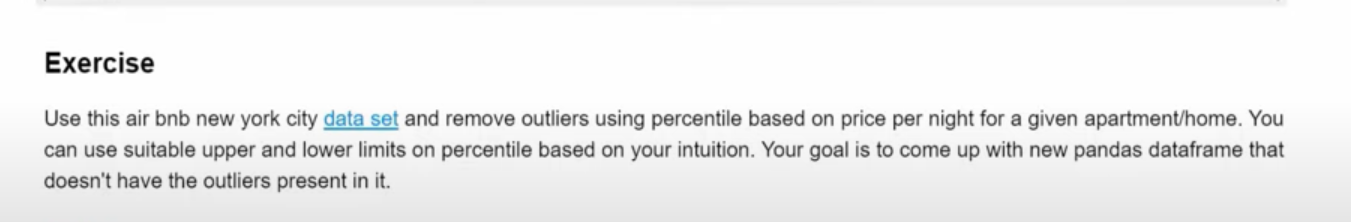